# Portfolio Part 3 - Analysis of Mobile Price Data (2024 S1)

**Student_Name- Asmita Kulkarni**
**Student_ID- 48111287**

In this Portfolio task, you will work on a new dataset named 'Mobile Price Data', it contains numerous details about mobile phone hardware, specifications, and prices. Your main task is to train classification models to predict **mobile phone prices** ('price range' in the dataset)and evaluate the strengths and weaknesses of these models.

Here's the explanation of each column:

|Column|Meaning|
|:-----:|:-----:|
|battery power|Total energy a battery can store in one time measured in mAh|
|blue|Has bluetooth or not|
|clock speed|speed at which microprocessor executes instructions|
|dual sim|Has dual sim support or not|
|fc|Front Camera mega pixels|
|four g|Has 4G or not|
|int memory|Internal Memory in Gigabytes|
|m dep|Mobile Depth in cm|
|mobile wt|Weight of mobile phone|
|n cores|Number of cores of processor|
|pc|Primary Camera mega pixels|
|px height|Pixel Resolution Height|
|px width|Pixel Resolution Width|
|ram|Random Access Memory in Mega Bytes|
|sc h|Screen Height of mobile in cm|
|sc w|Screen Width of mobile in cm|
|talk time|longest time that a single battery charge will last when you are|
|three g|Has 3G or not|
|touch screen|Has touch screen or not|
|wifi|Has wifi or not|
|price range|This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)|

Blue, dual sim, four g, three g, touch screen, and wifi are all binary attributes, 0 for not and 1 for yes.

Your high level goal in this notebook is to build and evaluate predictive models for 'price range' from other available features. More specifically, you need to **complete the following major steps**:

1. ***Explore the data*** and ***clean the data if necessary***. For example, remove abnormal instanaces and replace missing values.

2. ***Study the correlation*** between 'price range' with other features. And ***select the variables*** that you think are helpful for predicting the price range. We do not limit the number of variables.

3. ***Split the dataset*** (Trainging set : Test set = 8 : 2)

4. ***Train a logistic regression model*** to predict 'price range' based on the selected features (from the second step). ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.) ***Explain your model and evaluate its performance*** (Is the model performing well? If yes, what factors might be contributing to the good performance of your model? If not, how can improvements be made?).

5. ***Train a KNN model*** to predict 'price range' based on the selected features (you can use the features selected from the second step and set K with an ad-hoc manner in this step. ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.)

6. ***Tune the hyper-parameter K*** in KNN (Hints: GridsearchCV), ***visualize the results***, and ***explain*** how K influences the prediction performance.

  Hints for visualization: You can use line chart to visualize K and mean accuracy scores on test set.

Note 1: In this assignment, we no longer provide specific guidance and templates for each sub task. You should learn how to properly comment your notebook by yourself to make your notebook file readable.

Note 2: You will not being evaluated on the accuracy of the model but on the process that you use to generate it and your explanation.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

**Exploring and cleaning dataset.**
 1. Filling null values with zero.
 2. Removing abnormal instances like outliers. We consider columns only with numerical values and filter the dataset.

In [2]:
# Load and clean data
df = pd.read_csv('Mobile_Price_Data.csv')
print("Initial Data Info:")
print(df.info())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     1999 non-null   float64
 7   m_dep          1999 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       1999 non-null   float64
 13  ram            1999 non-null   float64
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        1999 non-null   fl

In [3]:
# Replace missing values with zeros 
df.fillna(0, inplace=True)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7.0,0.6,188,2,...,20,756.0,2549.0,9,7,19,0.0,0,1,1
1,1021,1,0.5,1,0,1,53.0,0.7,136,3,...,905,1988.0,2631.0,17,3,7,1.0,1,0,2
2,563,1,0.5,1,2,1,41.0,0.9,145,5,...,1263,1716.0,2603.0,11,2,9,1.0,1,0,2
3,615,1,2.5,0,0,0,10.0,0.8,131,6,...,1216,1786.0,2769.0,16,8,11,1.0,0,0,2
4,1821,1,1.2,0,13,1,44.0,0.6,141,2,...,1208,1212.0,1411.0,8,2,15,1.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2.0,0.8,106,6,...,1222,1890.0,668.0,13,4,19,1.0,1,0,0
1996,1965,1,2.6,1,0,0,39.0,0.2,187,4,...,915,1965.0,2032.0,11,10,16,1.0,1,1,2
1997,1911,0,0.9,1,1,1,36.0,0.7,108,8,...,868,1632.0,3057.0,9,1,5,1.0,1,0,3
1998,1512,0,0.9,0,4,1,46.0,0.1,145,5,...,336,670.0,869.0,18,10,19,1.0,1,1,0


In [4]:
# 'numerical_columns' is the list of numerical columns

numerical_columns = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

# Function to find and remove outliers in numerical columns
def remove_outliers(df, columns):
    df = df.copy()
    outlier_counts = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df, outlier_counts

# Find and remove outliers
df, outlier_counts = remove_outliers(df, numerical_columns)

# Print the count of outliers in each column
print("Outlier counts:")
for column, count in outlier_counts.items():
    print(f"{column}: {count}")

# df now contains the cleaned DataFrame without outliers in the specified numerical columns
df.info()

Outlier counts:
battery_power: 0
clock_speed: 0
fc: 18
int_memory: 0
m_dep: 0
mobile_wt: 0
n_cores: 0
pc: 0
px_height: 2
px_width: 0
ram: 0
sc_h: 0
sc_w: 0
talk_time: 0
<class 'pandas.core.frame.DataFrame'>
Index: 1980 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1980 non-null   int64  
 1   blue           1980 non-null   int64  
 2   clock_speed    1980 non-null   float64
 3   dual_sim       1980 non-null   int64  
 4   fc             1980 non-null   int64  
 5   four_g         1980 non-null   int64  
 6   int_memory     1980 non-null   float64
 7   m_dep          1980 non-null   float64
 8   mobile_wt      1980 non-null   int64  
 9   n_cores        1980 non-null   int64  
 10  pc             1980 non-null   int64  
 11  px_height      1980 non-null   int64  
 12  px_width       1980 non-null   float64
 13  ram            1980 non-null   float64
 14  sc_h           1980 

**Studying the Correlation: To find out the which numerical/ catogarical values variable/ feature is highly correlated with the price range of the mobile device.**
 1. We use clean dataset to study correlation.
 2. We plot correaltion heat map to see the absolute correaltion of each variable/ feature with the price range.
 3. The last row (price range) of the heat map aids in identifying highly associated values, such as 'ram' highlighted in orange, which indicate a positive correlation.
 4. After analysing the heatmap, we believe that the 'ram', 'battery_power', 'px_width', and 'px_height' features are most helpful in predicting the price range of the mobile device.

In [5]:
#finding correlatiom of the cleaned dataset
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.009743,0.010136,-0.042558,0.020317,0.015559,-0.009880,0.036296,0.002575,-0.026451,...,0.014290,-0.010379,0.001327,-0.023784,-0.016533,0.047909,0.010068,-0.010004,-0.009022,0.200763
blue,0.009743,1.000000,0.021739,0.033543,0.004142,0.012593,0.038687,0.004967,-0.008442,0.038278,...,-0.010266,-0.040326,0.021008,-0.001204,0.001278,0.009541,-0.028716,0.008115,-0.019082,0.015798
clock_speed,0.010136,0.021739,1.000000,-0.002017,-0.006342,-0.041597,0.003562,-0.010673,0.011939,-0.005638,...,-0.011326,-0.007354,0.003686,-0.026876,-0.005777,-0.010122,-0.044945,0.019023,-0.021960,-0.006120
dual_sim,-0.042558,0.033543,-0.002017,1.000000,-0.034041,0.002280,-0.015408,-0.020754,-0.005955,-0.025355,...,-0.018690,0.012977,0.041484,-0.011811,-0.012968,-0.043983,-0.014625,-0.015209,0.024064,0.019016
fc,0.020317,0.004142,-0.006342,-0.034041,1.000000,-0.019355,-0.029709,0.001685,0.014011,-0.001971,...,-0.027777,-0.011129,0.020174,0.000372,-0.001778,-0.008136,-0.002213,-0.024377,0.011902,0.021120
four_g,0.015559,0.012593,-0.041597,0.002280,-0.019355,1.000000,0.007522,-0.001311,-0.017901,-0.031608,...,-0.021117,0.009380,0.009648,0.026550,0.036958,-0.046438,0.583197,0.020094,-0.021650,0.015906
int_memory,-0.009880,0.038687,0.003562,-0.015408,-0.029709,0.007522,1.000000,0.005894,-0.031203,-0.024961,...,0.008935,-0.010755,0.032063,0.039163,0.013378,-0.008644,-0.009463,-0.030203,0.009067,0.042753
m_dep,0.036296,0.004967,-0.010673,-0.020754,0.001685,-0.001311,0.005894,1.000000,0.020926,-0.005343,...,0.022645,0.018995,-0.012614,-0.028857,-0.022833,0.017463,-0.013664,-0.004216,-0.028046,-0.002805
mobile_wt,0.002575,-0.008442,0.011939,-0.005955,0.014011,-0.017901,-0.031203,0.020926,1.000000,-0.018240,...,-0.000223,-0.001904,-0.005101,-0.032044,-0.019790,0.010434,0.003005,-0.016019,-0.000862,-0.031628
n_cores,-0.026451,0.038278,-0.005638,-0.025355,-0.001971,-0.031608,-0.024961,-0.005343,-0.018240,1.000000,...,-0.003893,0.025858,0.008495,-0.002913,0.024048,0.015609,-0.014222,0.026642,-0.011145,0.008307


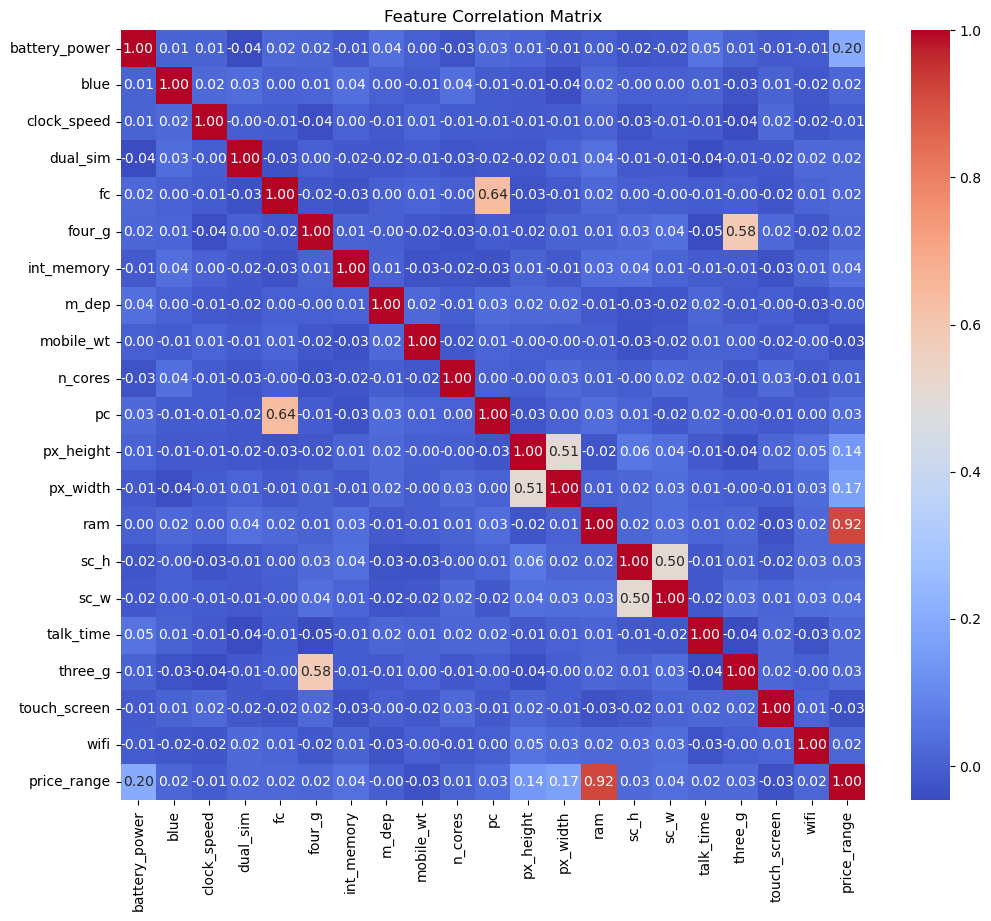

In [6]:
# Study the correlation between 'price range' and other features
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [7]:
# Select variables that have significant correlation with 'price range'
# This is a manual selection based on the heatmap analysis
significant_features = corr_matrix['price_range'].sort_values(key=abs, ascending=False).index[1:5].tolist()
print("Selected Features Based on Correlation:", significant_features)

# Select variables with high absolute correlation with price_range
selected_variables = corr_matrix['price_range'].abs().sort_values(ascending=False).index[1:]

# Print the top four highly correlated variables with price range and their correlation values
top_four_correlations = selected_variables[:4]
for variable in top_four_correlations:
    correlation_value = corr_matrix.loc[variable, 'price_range']
    print(f"The correlation between price_range and {variable} is {correlation_value:.2f}")

Selected Features Based on Correlation: ['ram', 'battery_power', 'px_width', 'px_height']
The correlation between price_range and ram is 0.92
The correlation between price_range and battery_power is 0.20
The correlation between price_range and px_width is 0.17
The correlation between price_range and px_height is 0.14


In [8]:
#Shape of train and test data. 
train_case_1, test_case_1 = train_test_split(df, test_size=0.2, random_state=10)
print(train_case_1.shape)
print(test_case_1.shape)

(1584, 21)
(396, 21)


In [9]:
# Split the dataset (Training set : Test set = 80 : 20)
X = df[significant_features]
y = df['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [10]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Logistic Regression**
 1. Train a logistic regression model to predict 'price range' based on the top_four_correlated features and finding the accuracy of the logistic regression model for train and test data set.
 2. We believe the high Accuaracy of the train and test set is because of the appropriate cleaning and replacing the abnormal instances.

In [11]:
# Train a logistic regression model with increased max_iter and different solver
logistic_model = LogisticRegression(max_iter=1000, solver='liblinear')  
logistic_model.fit(X_train_scaled, y_train)
y_pred_train_log = logistic_model.predict(X_train_scaled)
y_pred_test_log = logistic_model.predict(X_test_scaled)

In [12]:
# Evaluate Logistic Regression
print("Logistic Regression Training Accuracy:", accuracy_score(y_train, y_pred_train_log))
print("Logistic Regression Testing Accuracy:", accuracy_score(y_test, y_pred_test_log))
print("Logistic Regression Classification Report:\n", classification_report(y_train, y_pred_train_log))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_test_log))

Logistic Regression Training Accuracy: 0.8345959595959596
Logistic Regression Testing Accuracy: 0.8181818181818182
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       396
           1       0.77      0.66      0.71       398
           2       0.75      0.68      0.72       399
           3       0.89      0.99      0.94       391

    accuracy                           0.83      1584
   macro avg       0.83      0.84      0.83      1584
weighted avg       0.83      0.83      0.83      1584

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92       100
           1       0.74      0.57      0.64        97
           2       0.73      0.70      0.72        97
           3       0.90      1.00      0.95       102

    accuracy                           0.82       396
   macro avg       0.81      0.81   

**Evaluation of the Logistic regression model using classification report. Not only for a particular price range but when trained on multiple price range the accuracy of the model is good. Hence, we can conlcude that that our model is performing good.**

In [13]:
# Train a KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # Initial ad-hoc choice of K
knn.fit(X_train_scaled, y_train)
y_pred_train_knn = knn.predict(X_train_scaled)
y_pred_test_knn = knn.predict(X_test_scaled)

In [14]:
# Evaluate KNN
print("KNN Training Accuracy:", accuracy_score(y_train, y_pred_train_knn))
print("KNN Testing Accuracy:", accuracy_score(y_test, y_pred_test_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_test_knn))
print("KNN Classification Report:\n", classification_report(y_train, y_pred_train_knn))

KNN Training Accuracy: 0.9356060606060606
KNN Testing Accuracy: 0.8636363636363636
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93       100
           1       0.82      0.82      0.82        97
           2       0.78      0.82      0.80        97
           3       0.94      0.86      0.90       102

    accuracy                           0.86       396
   macro avg       0.86      0.86      0.86       396
weighted avg       0.87      0.86      0.86       396

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       396
           1       0.92      0.92      0.92       398
           2       0.90      0.91      0.90       399
           3       0.96      0.94      0.95       391

    accuracy                           0.94      1584
   macro avg       0.94      0.94      0.94      1584
weighted avg       0.94      0.94      0.94   

In [15]:
# Tune the hyper-parameter K in KNN
param_grid = {'n_neighbors': np.arange(1, 31)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])})

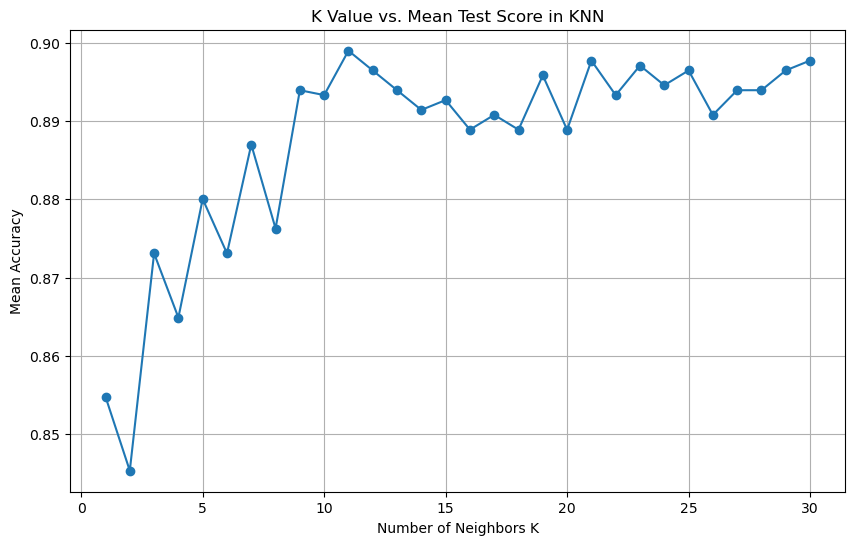

In [16]:
# Visualize results of the grid search
plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_neighbors'], grid.cv_results_['mean_test_score'], marker='o')
plt.title('K Value vs. Mean Test Score in KNN')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.show()

In [17]:
print("Best K:", grid.best_params_)
print("Best cross-validation score:", grid.best_score_)

Best K: {'n_neighbors': 11}
Best cross-validation score: 0.8989917342171465


**The KNN model with a K value of 11 performs well on both the training and testing sets, with somewhat better results on the training set than the testing set. K value of 11 in KNN tends to result in a balanced model. This shows that the model generalises well to new data and effectively classifies samples into their appropriate classes.**